# BIT数据挖掘-数据探索性分析与数据预处理

## 数据集：Wine Reviews

## 目录
    1. 数据读取
    2. 数据可视化和摘要
        2.1 标称属性
        2.2 数值属性
    3. 数据缺失的处理
        3.1 将缺失部分剔除
        3.2 用最高频率值来填补缺失值
        3.3 通过属性的相关关系来填补缺失值
        3.4 通过数据对象之间的相似性来填补缺失值

数据描述：

    Unnamed:0

(未命名)序号，对数据分析、数据挖掘无帮助，可删除

    country

The country that the wine is from 葡萄酒来源国家，即生产国

    description

葡萄酒描述

    designation

The vineyard within the winery where the grapes that made the wine are from 葡萄园名称

    points

The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)评分

    price

The cost for a bottle of the wine价格

    province

The province or state that the wine is from 省或州

    region_1

The wine growing area in a province or state 葡萄种植地区1

    region_2

Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank 葡萄种植地区2

    variety

The type of grapes used to make the wine 葡萄品种

    winery

The winery that made the wine 酿酒厂

在winemag-data-130k-v2数据集中又增加了三列信息：

    taster_name

品鉴师

    taster_twitter_handle

品鉴师twitter

    title

头衔

### 1. 数据读取

In [35]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from impyute import fast_knn
import copy
from sklearn.ensemble import RandomForestRegressor

In [2]:
file_path_150 = "./wine/winemag-data_first150k.csv"
file_path_130 = "./wine/winemag-data-130k-v2.csv"
# 读取数据
df_150 = pd.read_csv(file_path_150)
df_130 = pd.read_csv(file_path_130)

In [3]:
# 因序号对数据挖掘没有帮助，因此删除该列数据
drop_columns_name_150 = df_150.columns[0]
drop_columns_name_130 = df_130.columns[0]
df_150.drop(drop_columns_name_150, axis=1, inplace=True)
df_130.drop(drop_columns_name_130, axis=1, inplace=True)

In [4]:
# winemag-data_first150k样本数据信息概览
print("winemag-data_first150k数据 size：\n{}".format(df_150.shape))
print("winemag-data_first150k数据 信息概览：")
df_150.info()

winemag-data_first150k数据 size：
(150930, 10)
winemag-data_first150k数据 信息概览：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [5]:
# winemag-data-130k-v2样本数据信息概览
print("winemag-data-130k-v2数据 size：\n{}".format(df_130.shape))
print("winemag-data-130k-v2数据 信息概览：")
df_130.info()

winemag-data-130k-v2数据 size：
(129971, 13)
winemag-data-130k-v2数据 信息概览：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


### 2. 数据可视化和摘要

In [6]:
# 标称属性和数值属性
nominal_attributes_150 = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'winery']
numeric_attributes_150 = ['points', 'price']

nominal_attributes_130 = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'winery', 'taster_name']
numeric_attributes_130 = ['points', 'price']

#### 2.1 标称属性

    数据摘要

In [7]:
# winemag-data_first150k 数据，如果希望展示属性取值全部频数，请把"[:20]去掉
print("在winemag-data_first150k数据中：")
for column in nominal_attributes_150:
    print("{} 属性值频数(只展示排名前20的属性取值)：\n{}".format(column, df_150[column].value_counts()[:20]))
    print(50 * "-")

在winemag-data_first150k数据中：
country 属性值频数(只展示排名前20的属性取值)：
US              62397
Italy           23478
France          21098
Spain            8268
Chile            5816
Argentina        5631
Portugal         5322
Australia        4957
New Zealand      3320
Austria          3057
Germany          2452
South Africa     2258
Greece            884
Israel            630
Hungary           231
Canada            196
Romania           139
Slovenia           94
Uruguay            92
Croatia            89
Name: country, dtype: int64
--------------------------------------------------
designation 属性值频数(只展示排名前20的属性取值)：
Reserve                 2752
Reserva                 1810
Estate                  1571
Barrel sample           1326
Riserva                  754
Barrel Sample            639
Brut                     624
Crianza                  503
Estate Grown             449
Estate Bottled           396
Dry                      374
Old Vine                 331
Gran Reserva             330
Brut Rosé   

In [8]:
# winemag-data-130k-v2 数据，如果希望展示属性取值全部频数，请把"[:20]去掉
print("在winemag-data-130k-v2数据中：")
for column in nominal_attributes_130:
    print("{} 属性值频数(只展示排名前20的属性取值)：\n{}".format(column, df_130[column].value_counts()[:20]))
    print(50 * "-")

在winemag-data-130k-v2数据中：
country 属性值频数(只展示排名前20的属性取值)：
US              54504
France          22093
Italy           19540
Spain            6645
Portugal         5691
Chile            4472
Argentina        3800
Austria          3345
Australia        2329
Germany          2165
New Zealand      1419
South Africa     1401
Israel            505
Greece            466
Canada            257
Hungary           146
Bulgaria          141
Romania           120
Uruguay           109
Turkey             90
Name: country, dtype: int64
--------------------------------------------------
designation 属性值频数(只展示排名前20的属性取值)：
Reserve            2009
Estate             1322
Reserva            1259
Riserva             698
Estate Grown        621
Brut                513
Dry                 413
Barrel sample       375
Crianza             343
Estate Bottled      342
Vieilles Vignes     308
Brut Rosé           276
Gran Reserva        261
Barrel Sample       252
Tradition           238
Old Vine            221
Extra D

    数据可视化
方法：条形图，目的是查看标称属性中属性取值的频数分布

而直方图、盒图不适合展示标称属性中属性取值的频数分布

In [11]:
# 根据上述得到的属性值频数统计知，属性值取值范围宽广，为了可视化效果，函数默认选择可视化频数排名前20的属性值，当然还可以人为设置figsize和num来选择可视化的数据对象
def nominal_attributes_plt(df, nominal_attributes, figsize=(50, 50), num=20):
    for i, column in enumerate(nominal_attributes):
        plt.subplot(3, 3, i + 1)
        df[column].value_counts()[:num].plot.bar(title=column, figsize=figsize, alpha=0.7)
    plt.show()

在winemag-data_first150k数据中：


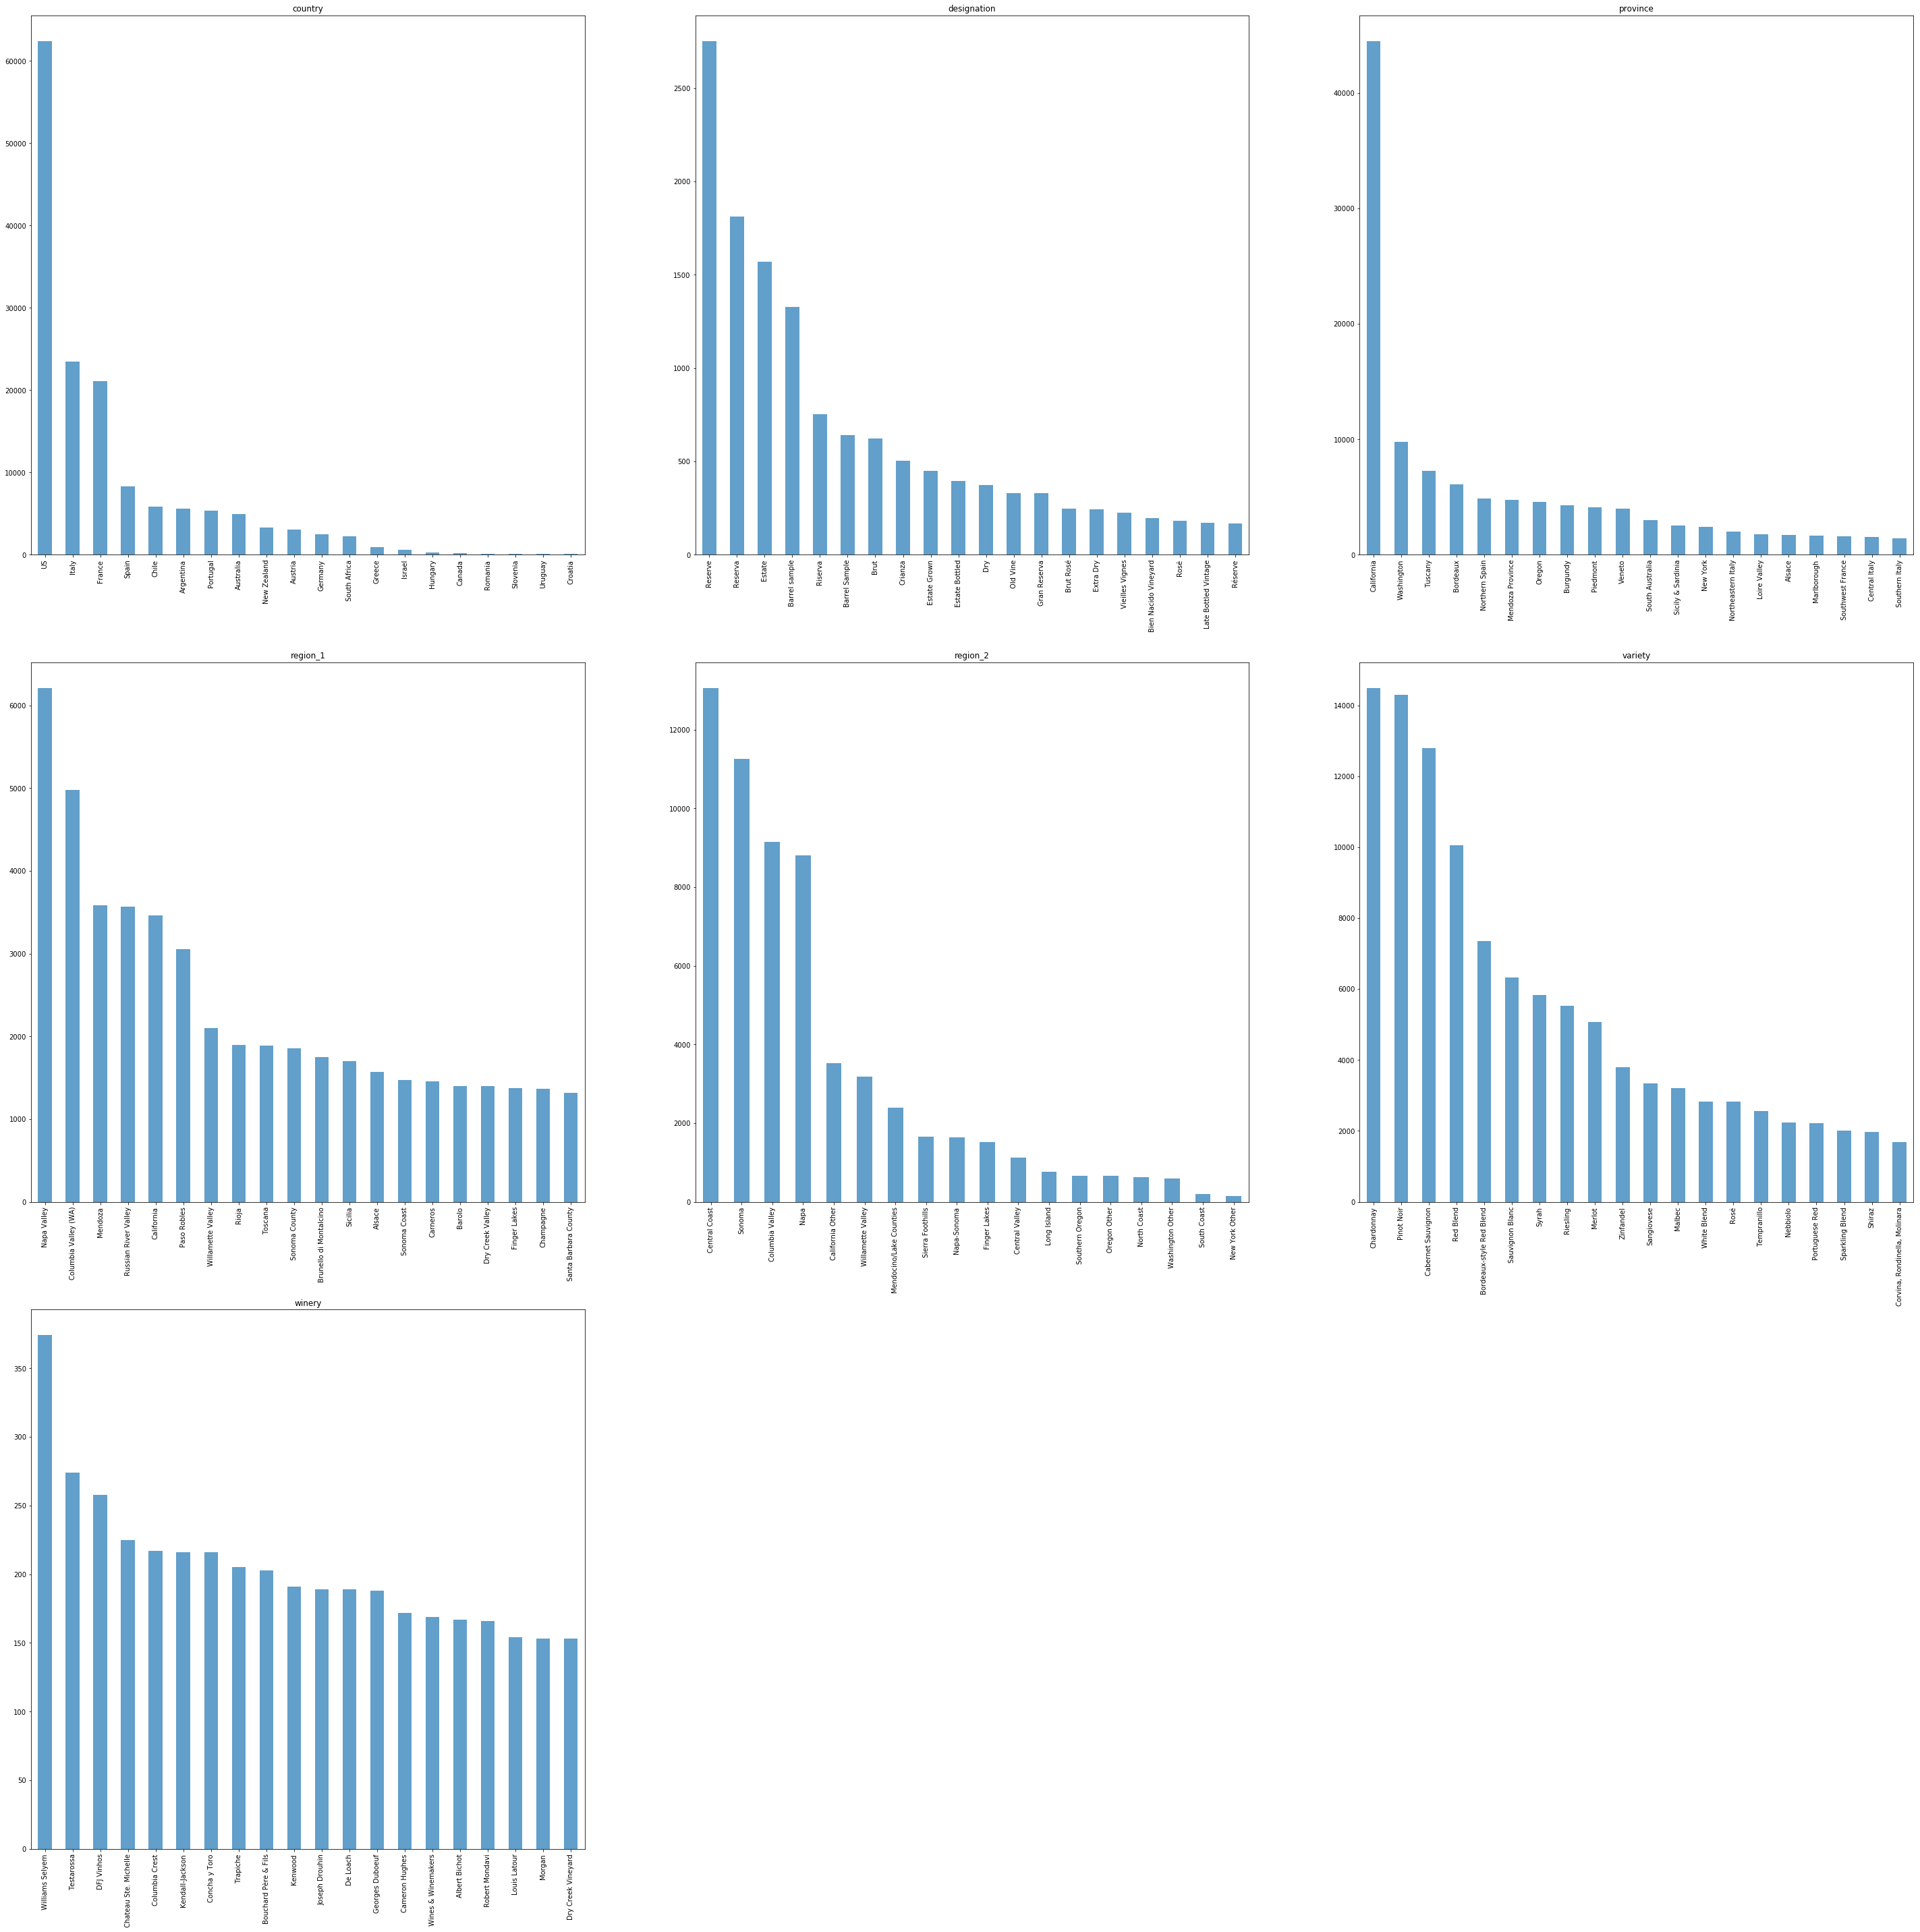

----------------------------------------------------------------------
在winemag-data-130k-v2数据中：


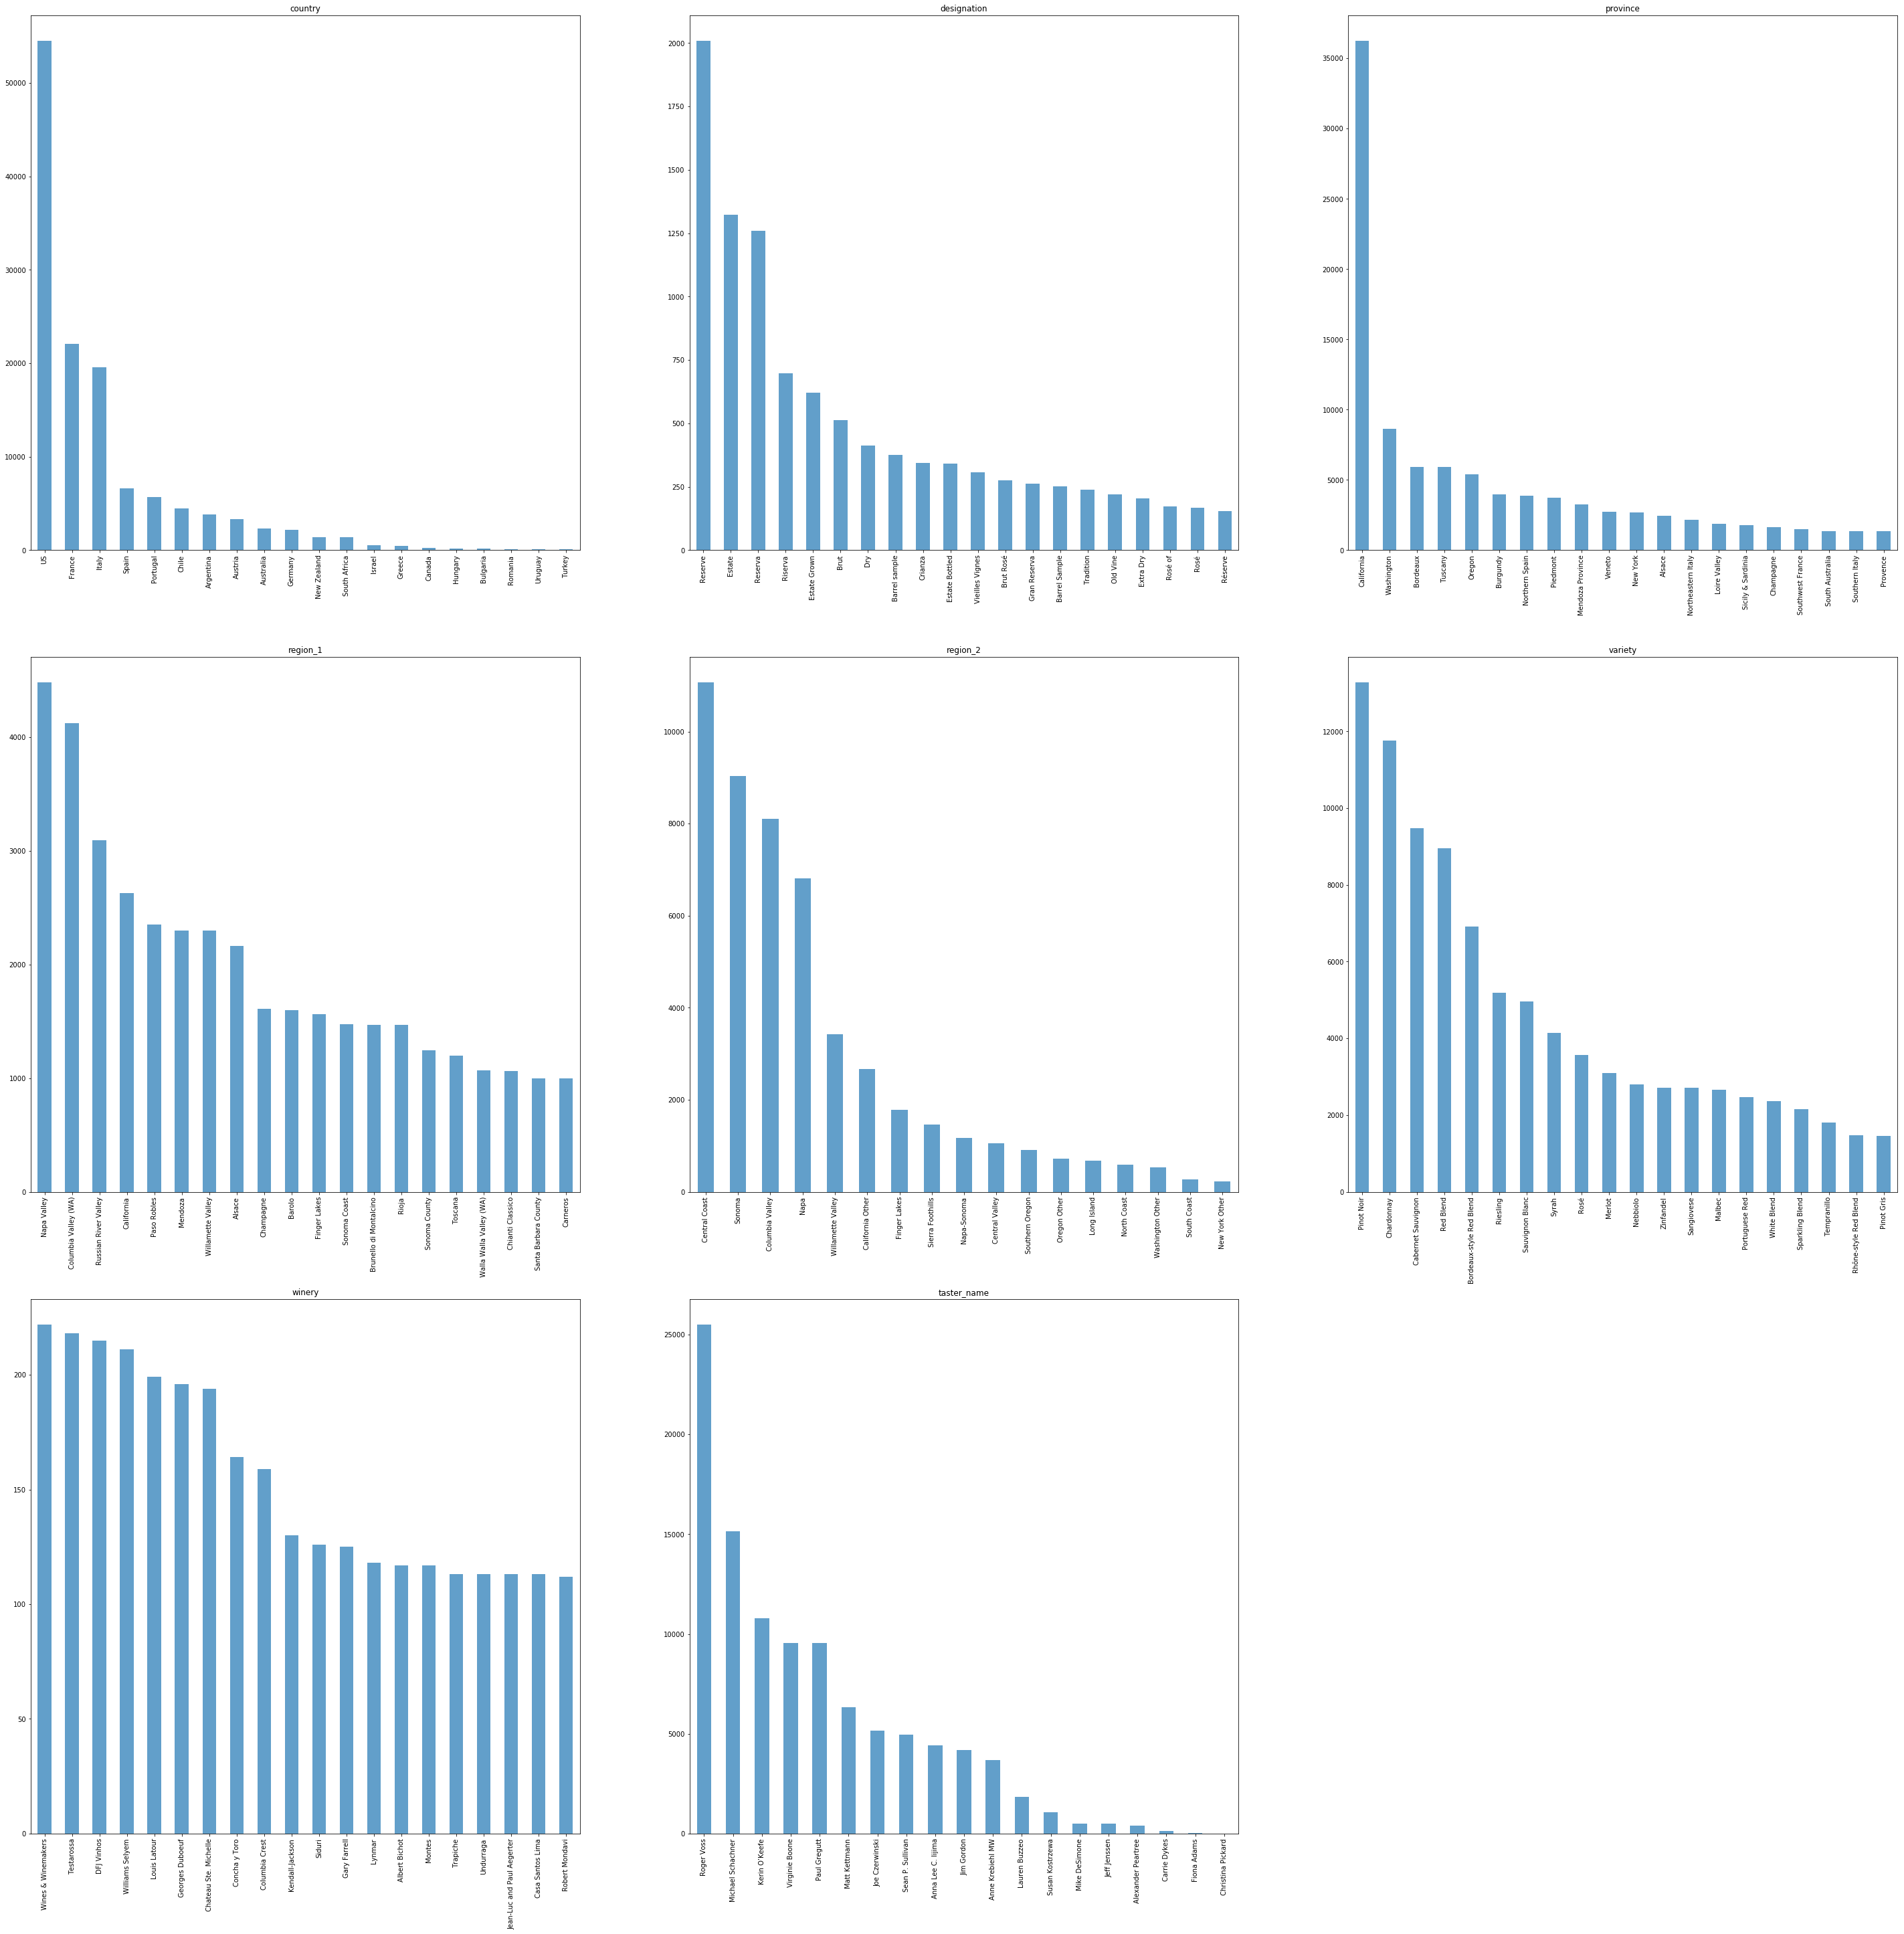

In [12]:
# winemag-data_first150k 数据
print("在winemag-data_first150k数据中：")
nominal_attributes_plt(df_150, nominal_attributes_150)
print(70 * '-')
# winemag-data-130k-v2 数据
print("在winemag-data-130k-v2数据中：")
nominal_attributes_plt(df_130, nominal_attributes_130)

#### 2.2 数值属性

    数据摘要

In [38]:
# 查看数值属性points、price的五数概括
# winemag-data_first150k 数据
print("在winemag-data_first150k数据中：")
print(df_150.describe())
print(50 * '-')
# winemag-data-130k-v2 数据
print("在winemag-data-130k-v2数据中")
print(df_130.describe())

在winemag-data_first150k数据中：
              points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000
--------------------------------------------------
在winemag-data-130k-v2数据中
              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000


    数值属性points、price五数概括：
    winemag-data_first150k数据：
    points：
        最小值：80
        四分位数（Q1）：86
        中位数：88
        四分位数（Q3）：90
        最大值：100
    price：
        最小值：4
        四分位数（Q1）：16
        中位数：24
        四分位数（Q3）：40
        最大值：2300
    -------------------------------
    winemag-data-130k-v2数据：
    points：
        最小值：80
        四分位数（Q1）：86
        中位数：88
        四分位数（Q3）：91
        最大值：100
    price：
        最小值：4
        四分位数（Q1）：17
        中位数：25
        四分位数（Q3）：42
        最大值：3300

In [14]:
# 查看数值属性points、price缺失值个数
# winemag-data_first150k 数据
print("在winemag-data_first150k数据中：")
for column in numeric_attributes_150:
    print("    {} 缺失值个数为：{}".format(column, df_150[column].isnull().sum()))
print(30 * '-')
print("在winemag-data-130k-v2数据中：")
for column in numeric_attributes_130:
    print("    {} 缺失值个数为：{}".format(column, df_130[column].isnull().sum()))

在winemag-data_first150k数据中：
    points 缺失值个数为：0
    price 缺失值个数为：13695
------------------------------
在winemag-data-130k-v2数据中：
    points 缺失值个数为：0
    price 缺失值个数为：8996


    数据可视化

In [15]:
# 数据可视化方法：直方图，查看数值属性取值频率
def numeric_attributes_hist(df, numeric_attributes, figsize=(10, 15)):
    for i, column in enumerate(numeric_attributes):
        if column == "price":
            bins, alpha = 200, 0.9
        else:
            bins, alpha = 20, 0.5
        plt.subplot(2, 1, i + 1)
        df[column].plot.hist(title=column, figsize=figsize, bins=bins, alpha=alpha)
    plt.show()

在winemag-data_first150k数据中：


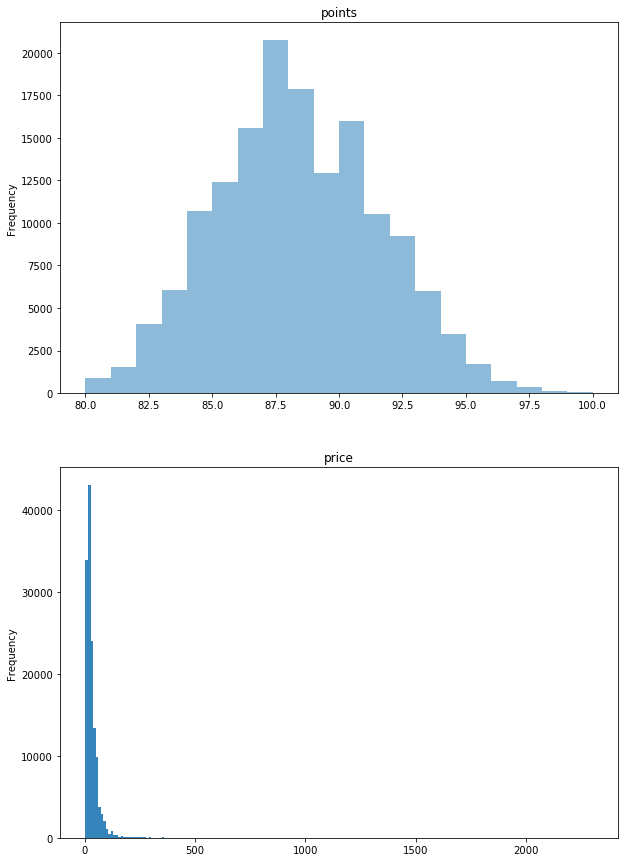

----------------------------------------------------------------------
在winemag-data-130k-v2数据中：


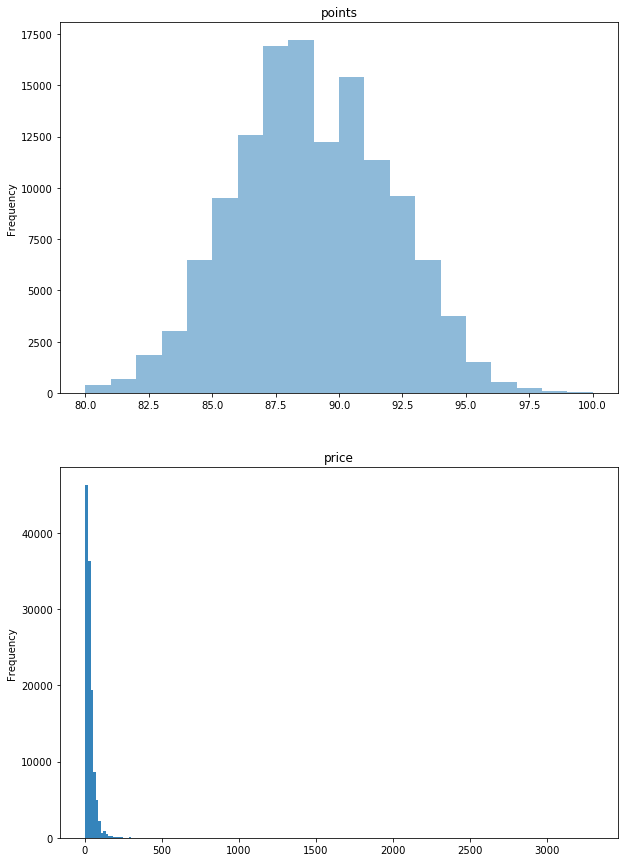

In [16]:
# winemag-data_first150k 数据
print("在winemag-data_first150k数据中：")
numeric_attributes_hist(df_150, numeric_attributes_150)
print(70 * '-')
# winemag-data-130k-v2
print("在winemag-data-130k-v2数据中：")
numeric_attributes_hist(df_130, numeric_attributes_130)

在winemag-data_first150k数据中：


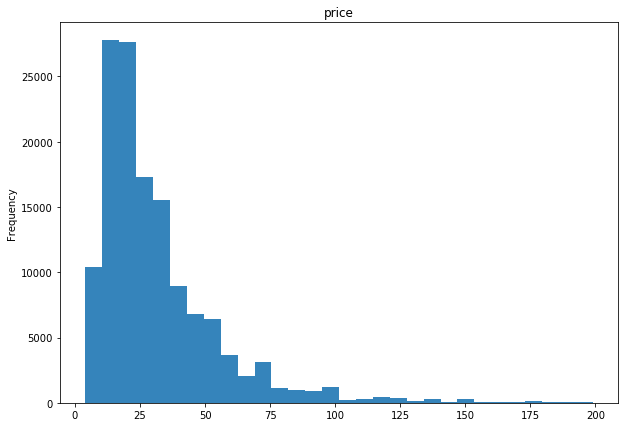

----------------------------------------------------------------------
在winemag-data-130k-v2数据中：


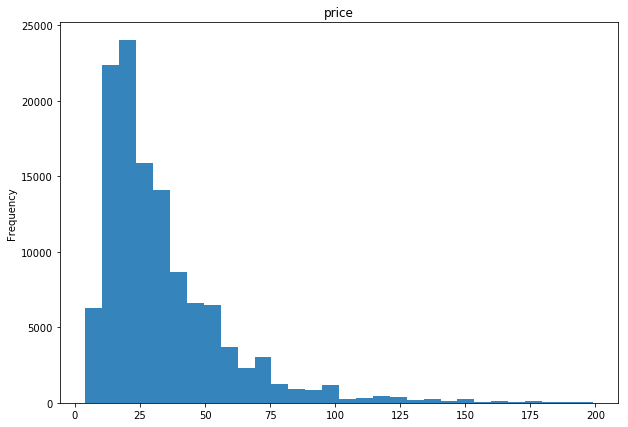

In [17]:
# 其中price数据取值非常分散，再把price<200数据使用直方图可视化
print("在winemag-data_first150k数据中：")
df_150[df_150["price"] < 200]["price"].plot.hist(title="price", figsize=(10, 7), bins=30, alpha=0.9)
plt.show()
print(70 * '-')
print("在winemag-data-130k-v2数据中：")
df_130[df_130["price"] < 200]["price"].plot.hist(title="price", figsize=(10, 7), bins=30, alpha=0.9)
plt.show()

在winemag-data_first150k数据中：


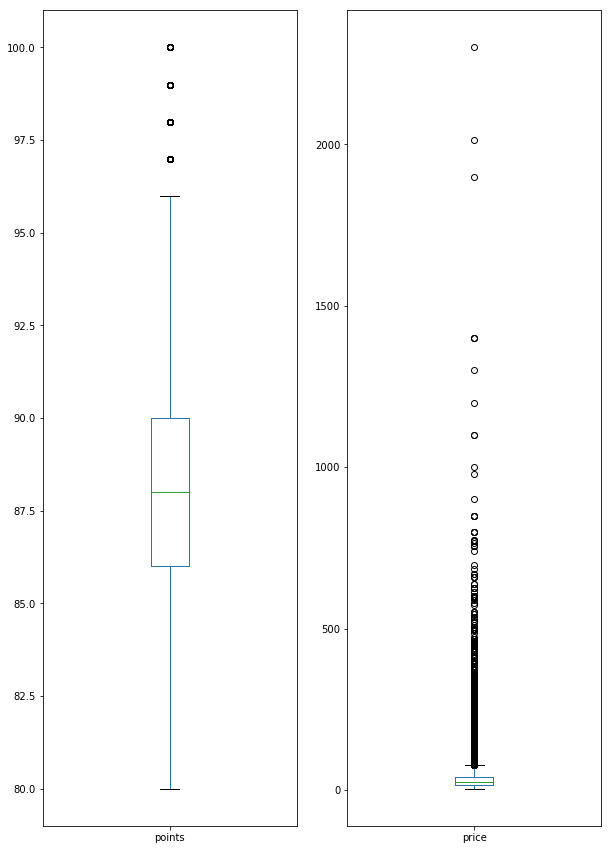

----------------------------------------------------------------------
在winemag-data-130k-v2数据中：


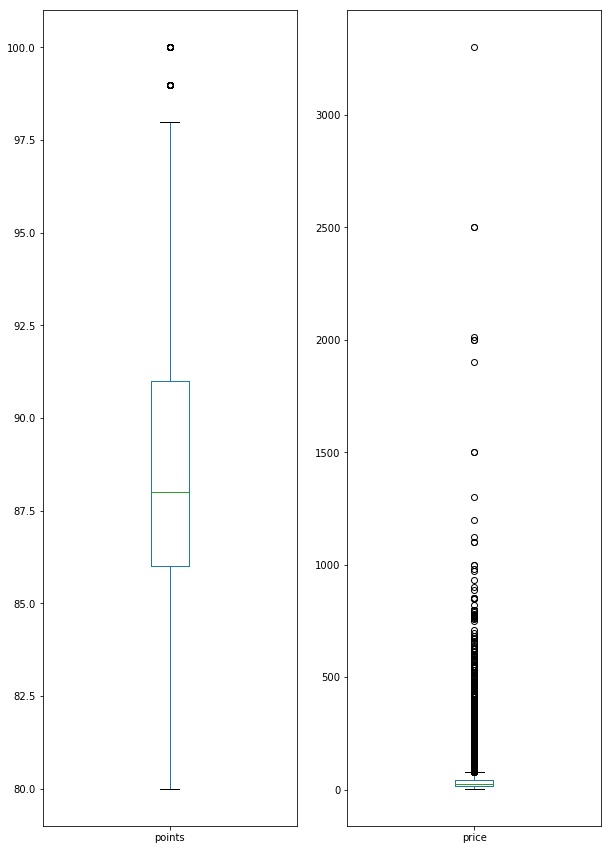

In [18]:
# 数据可视化方法：盒图，通过盒图查看数值属性数据的分布及离群点
# points
print("在winemag-data_first150k数据中：")
plt.subplot(1, 2, 1)
df_150["points"].plot.box(figsize=(10, 15))
plt.subplot(1, 2, 2)
df_150["price"].plot.box(figsize=(10, 15))
plt.show()
print(70 * '-')
print("在winemag-data-130k-v2数据中：")
plt.subplot(1, 2, 1)
df_130["points"].plot.box(figsize=(10, 15))
plt.subplot(1, 2, 2)
df_130["price"].plot.box(figsize=(10, 15))
plt.show()

在winemag-data_first150k数据中：


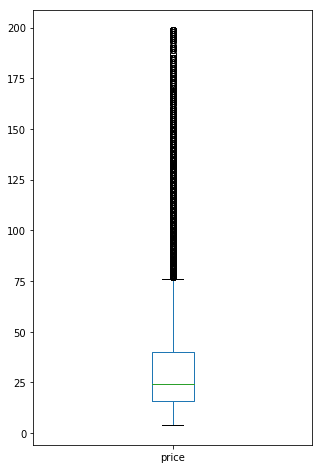

----------------------------------------------------------------------
在winemag-data-130k-v2数据中：


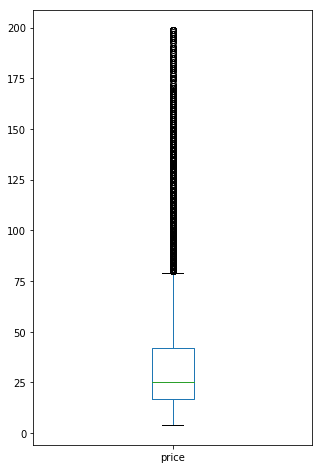

In [19]:
# 其中price数据取值非常分散，再把price<200数据使用盒图可视化
print("在winemag-data_first150k数据中：")
df_150[df_150["price"] < 200]["price"].plot.box(figsize=(5, 8))
plt.show()
print(70 * '-')
print("在winemag-data-130k-v2数据中：")
df_130[df_130["price"] < 200]["price"].plot.box(figsize=(5, 8))
plt.show()

### 3. 数据缺失的处理

In [20]:
# 查看数据缺失情况
print("在winemag-data_first150k数据中：")
print(df_150.isnull().sum())
print(30 * '-')
print("在winemag-data-130k-v2数据中：")
print(df_130.isnull().sum())

在winemag-data_first150k数据中：
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64
------------------------------
在winemag-data-130k-v2数据中：
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


根据上面程序结果，可以得出：

在winemag-data_first150k数据中：共有6个属性存在缺失值，分别是country、designation、price、province、region_1、region_2。缺失原因分析如下：

country和province属性缺失值个数较少，出现缺失值的可能原因在于未标明产地或记录缺失

designation属性为葡萄园名字，该字段缺失可能是因为未知葡萄来源

price属性缺失值较多，可能是由于未记录

region_1和region_2属性为葡萄酒产地详细信息，缺失值较多，原因可能在于这些产地信息力度较细，所以包括的信息数量会相对较少，导致缺省值较多。

在winemag-data-130k-v2数据中：共有9个属性存在缺失值，分别是country、designation、price、province、region_1、region_2、taster_name、taster_twitter_handle、variety。再对新添加的三个缺失属性信息进行如下分析：

taster_name、taster_twitter_handle为品鉴师的姓名及twitter，该数据缺失原因可能是涉及隐私问题，品鉴师未提供相关信息。

variety属性缺失值为1，猜测缺失原因是数据记录缺失。

#### 3.1 将缺失部分剔除

In [22]:
# 可视化对比标称属性新旧数据，其中左侧为旧数据，右侧为新数据
def nominal_attributes_bf_af(df_1, df_2, nominal_attributes, figsize=(60, 90), num=20):
    for i, column in enumerate(nominal_attributes):
        plt.subplot(7, 2, i * 2 + 1)
        df_1[column].value_counts()[:num].plot.bar(title=column, figsize=figsize, alpha=0.5)
        plt.subplot(7, 2, i * 2 + 2)
        df_2[column].value_counts()[:num].plot.bar(title=column, figsize=figsize, alpha=0.9)
    plt.show()

在winemag-data_first150k数据中：


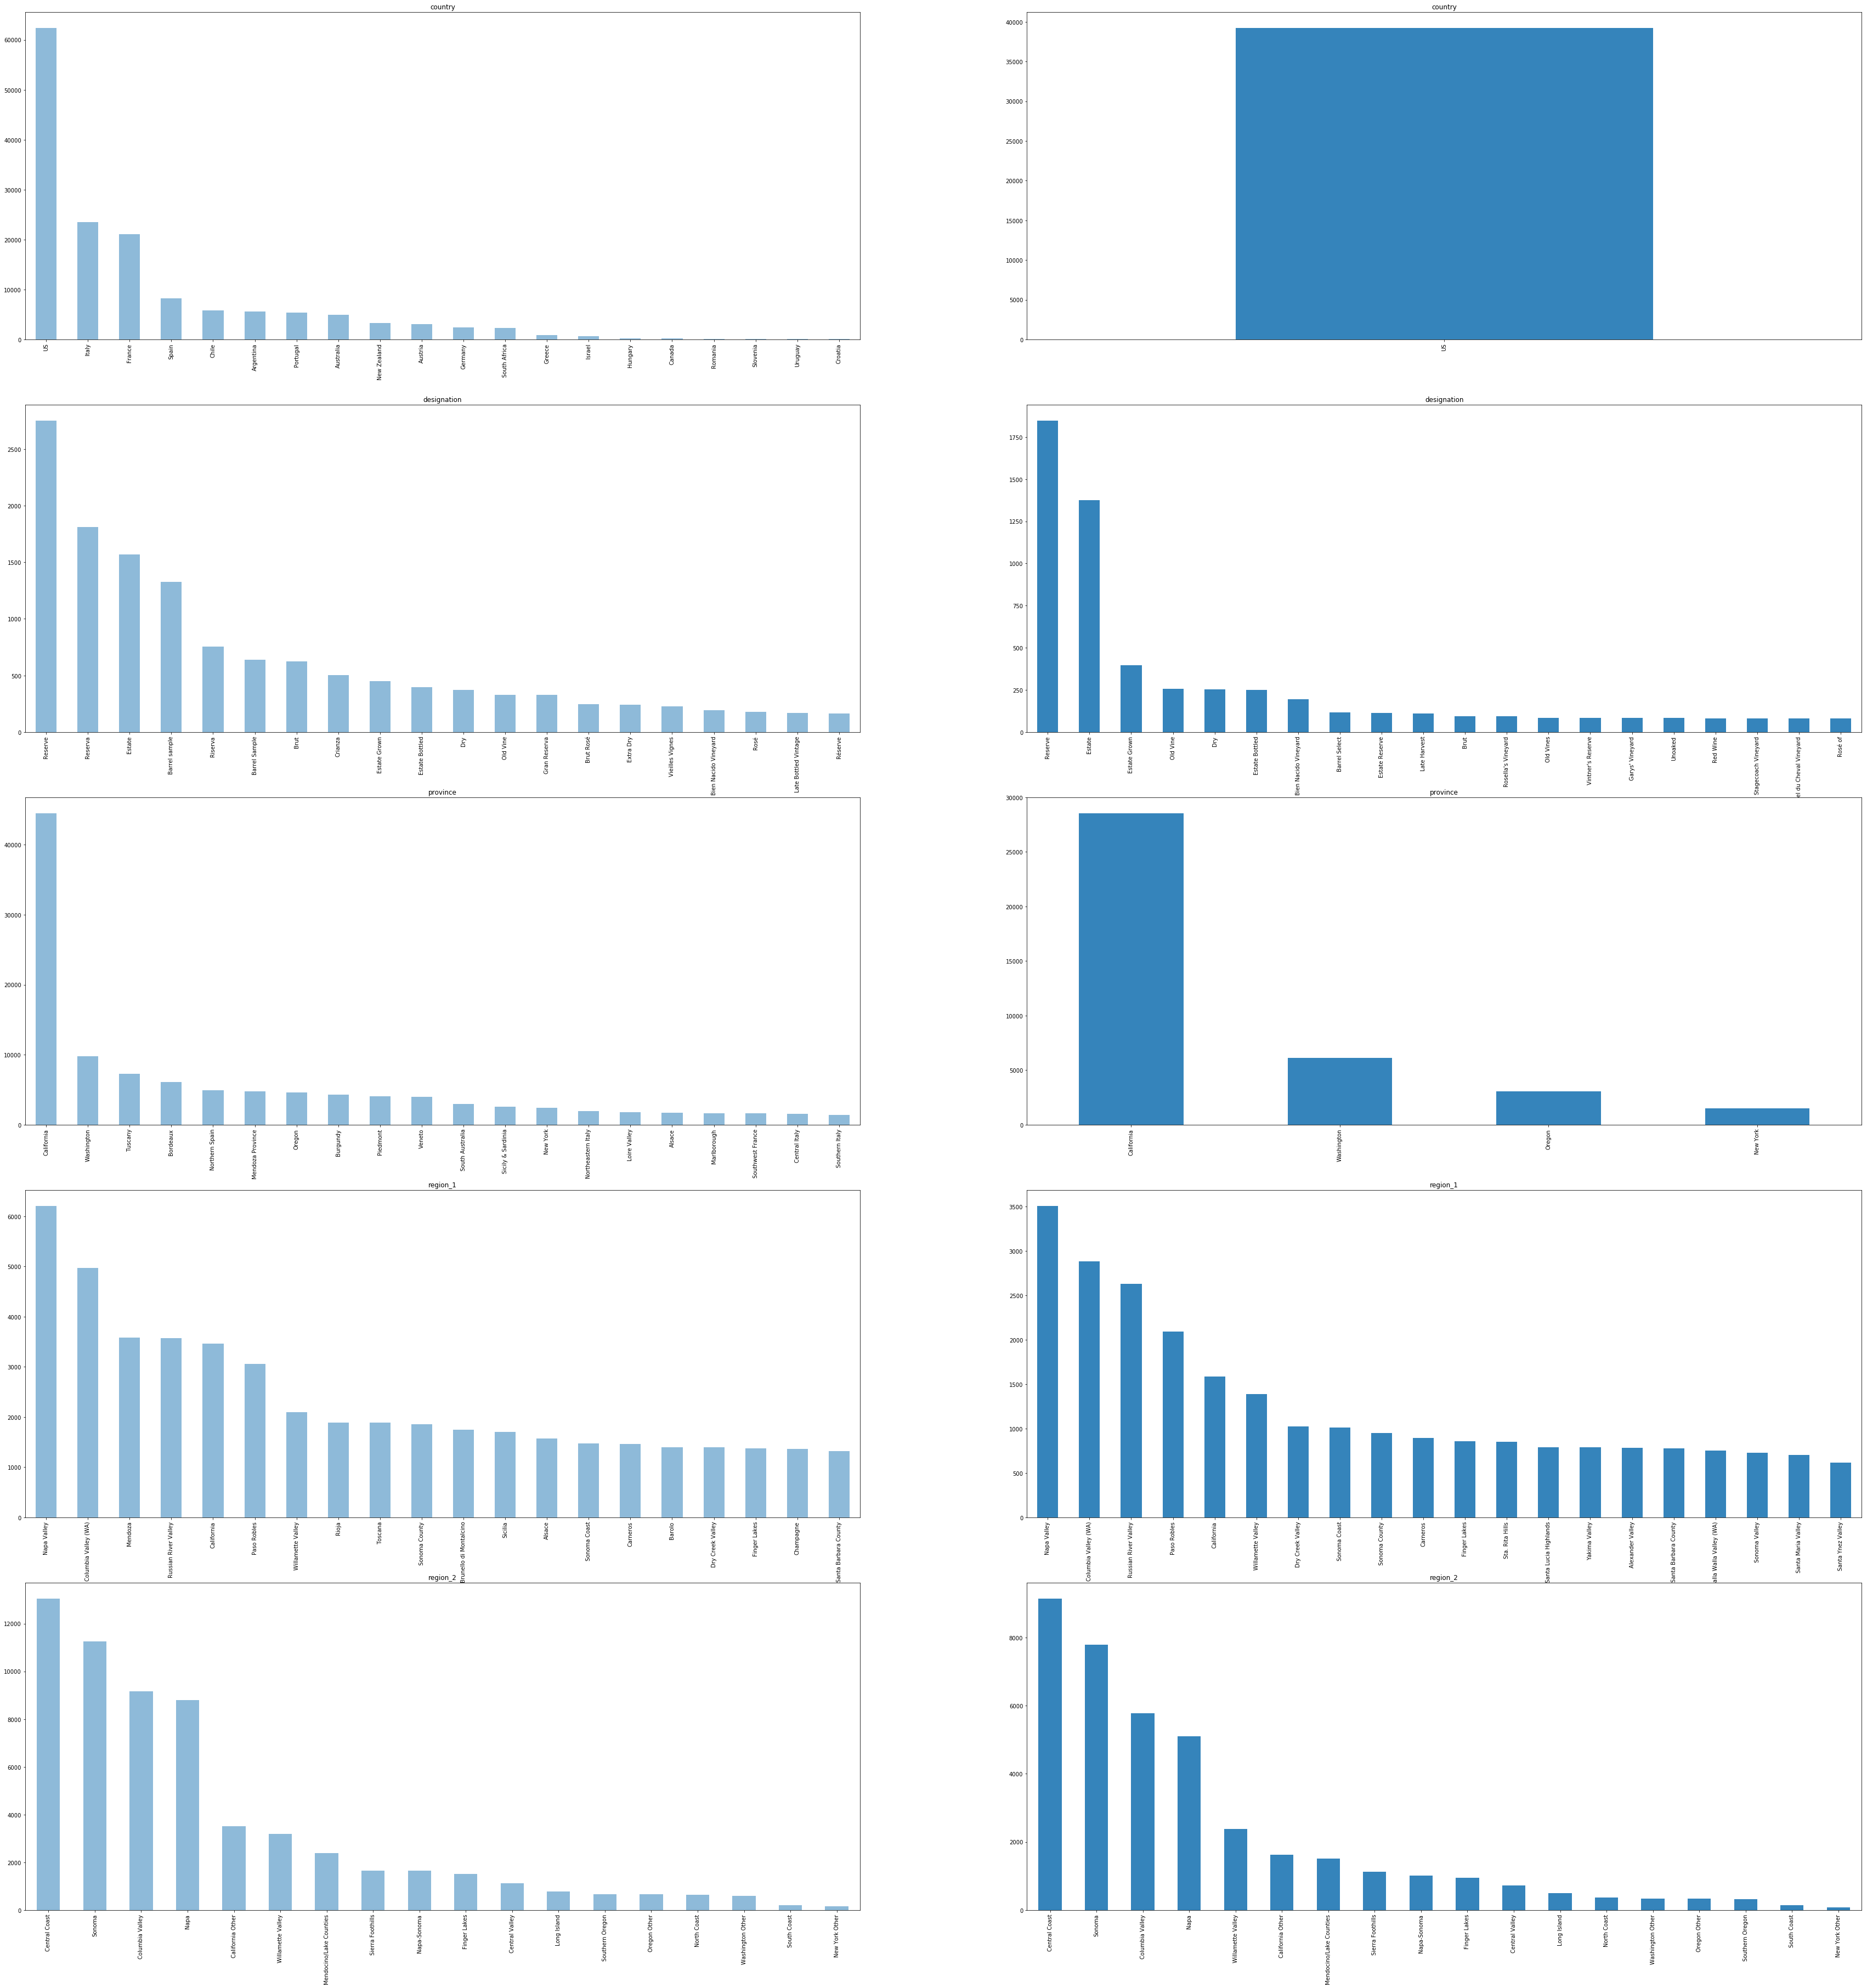

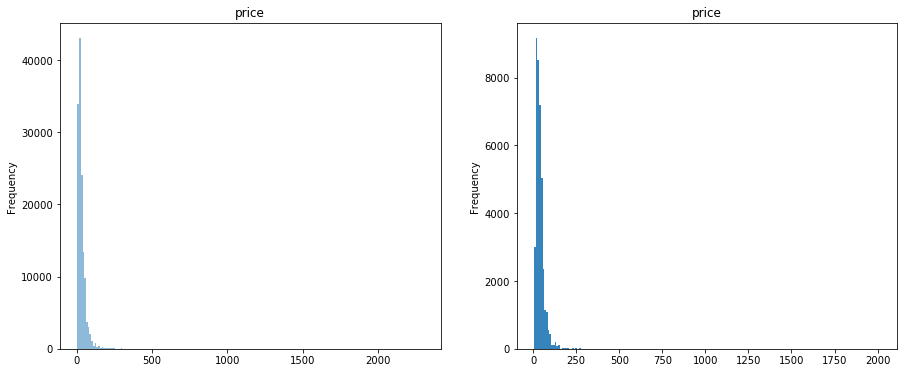

----------------------------------------------------------------------
在winemag-data-130k-v2数据中：


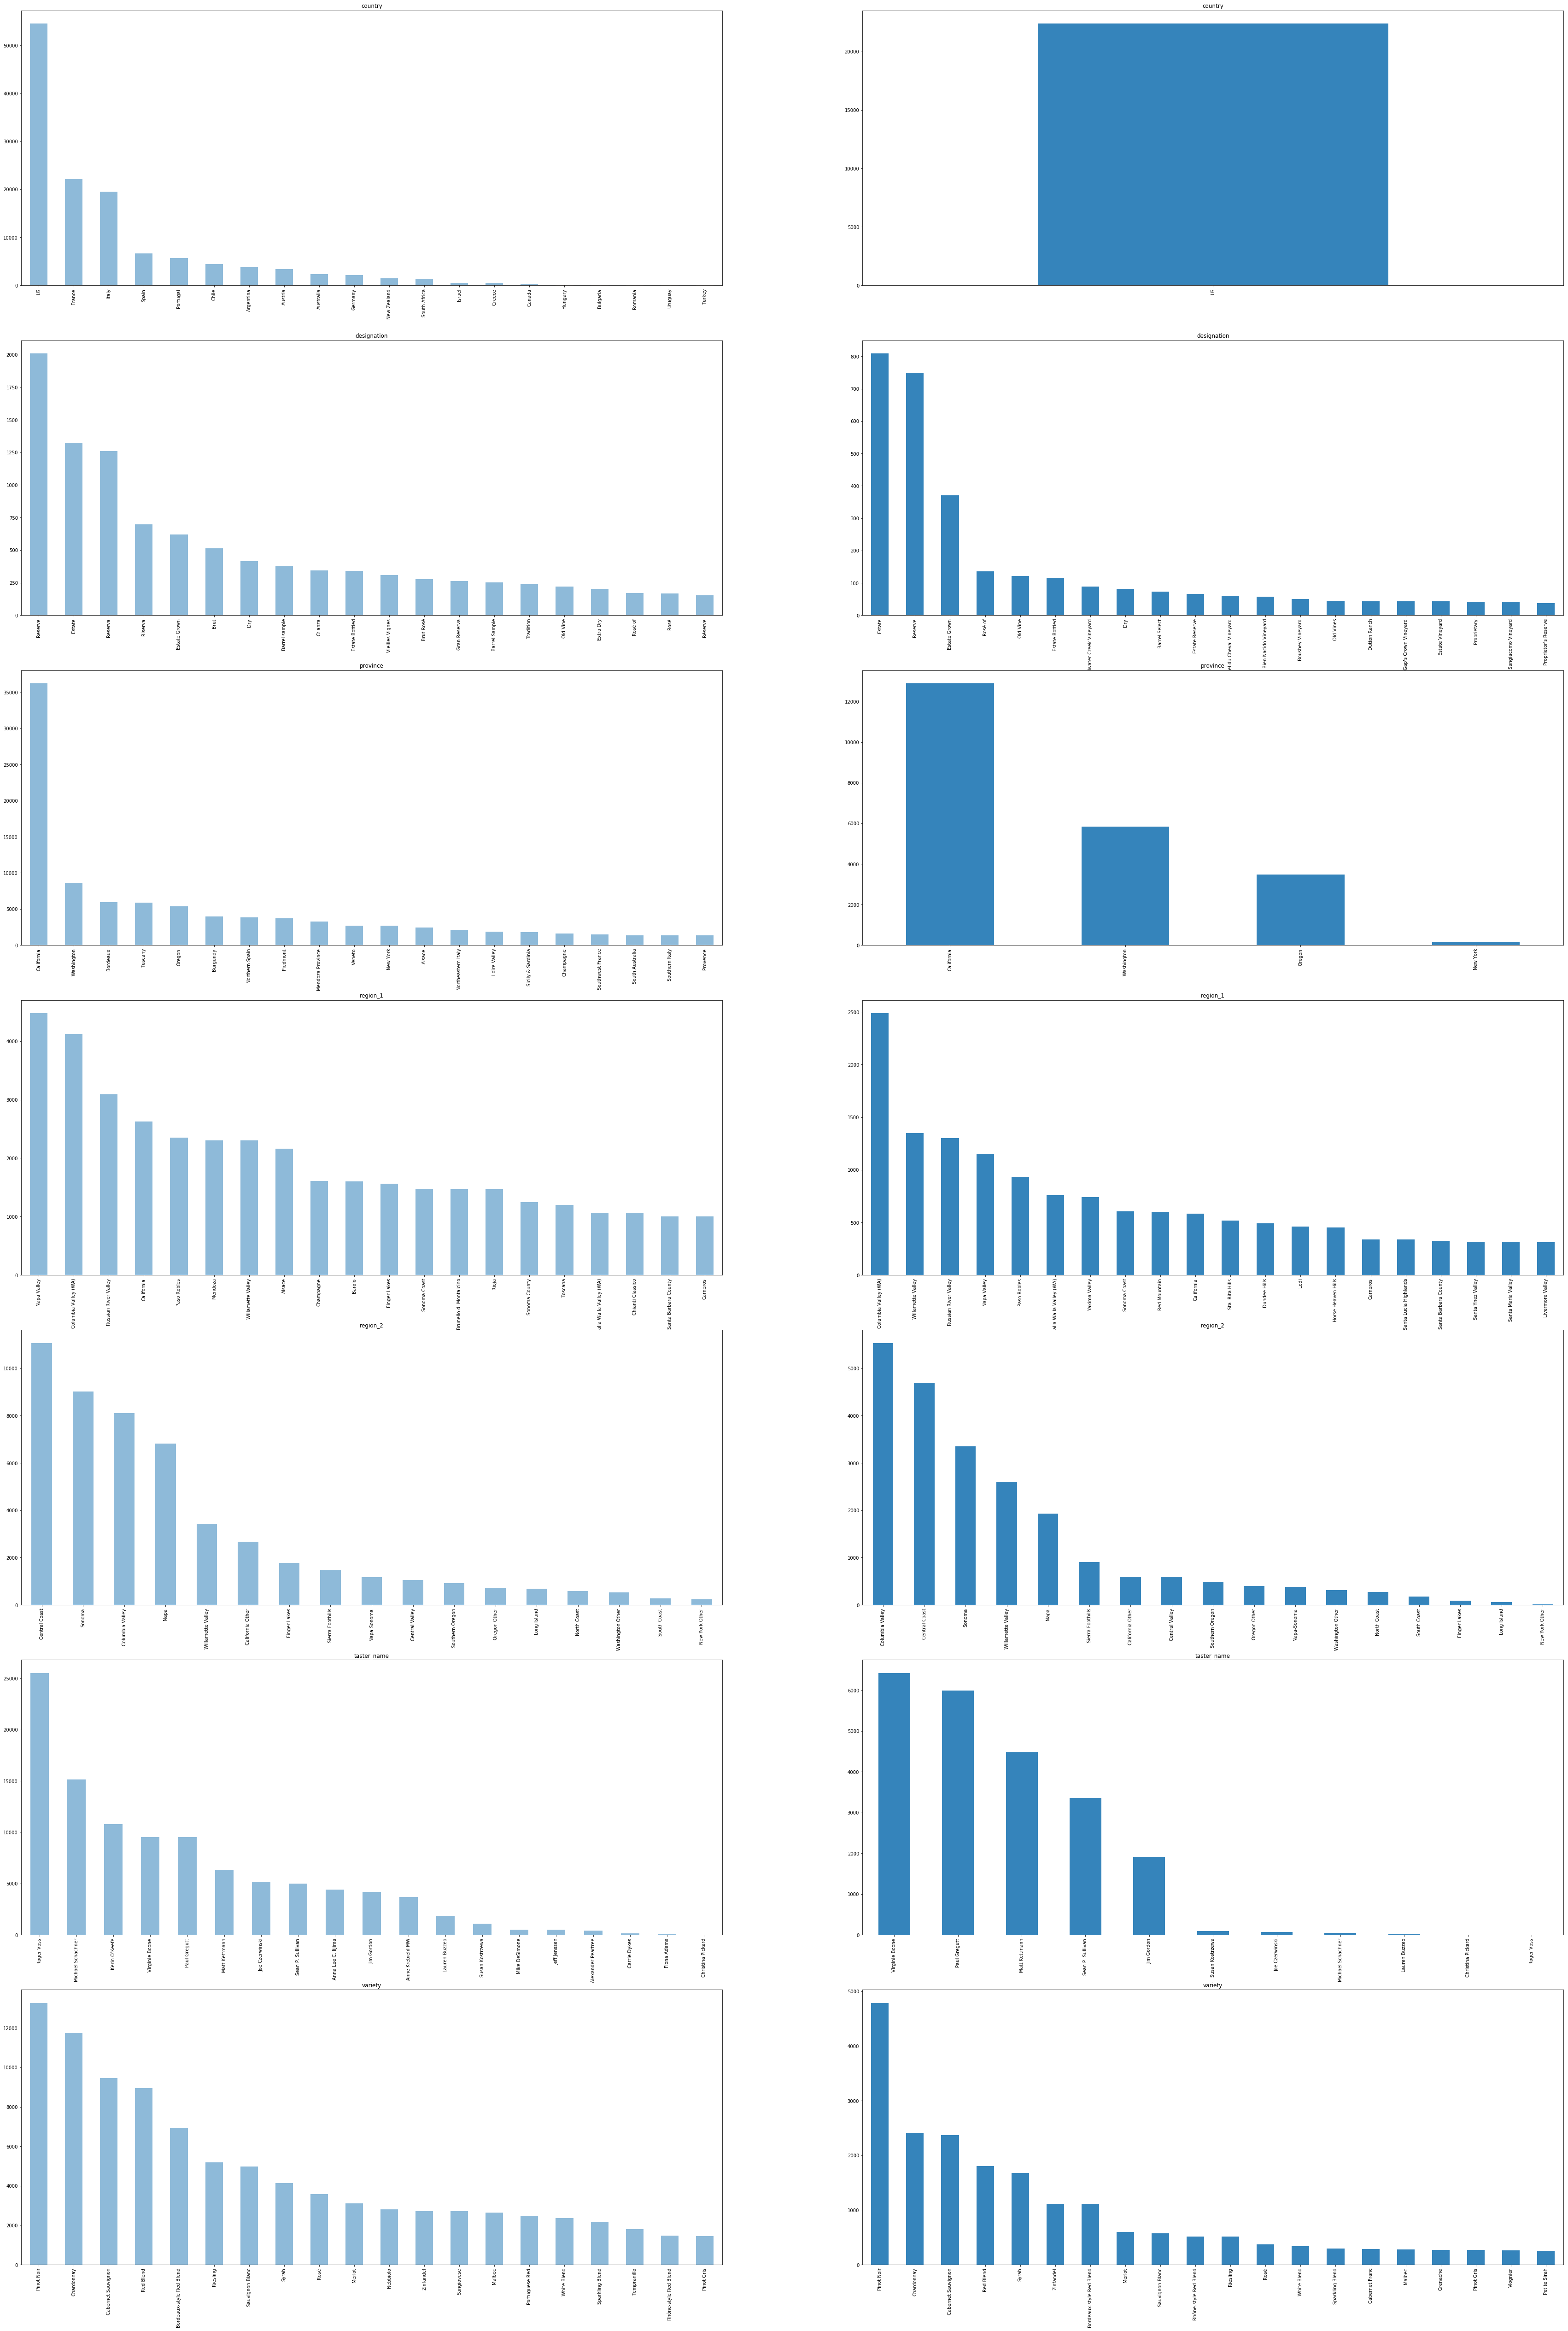

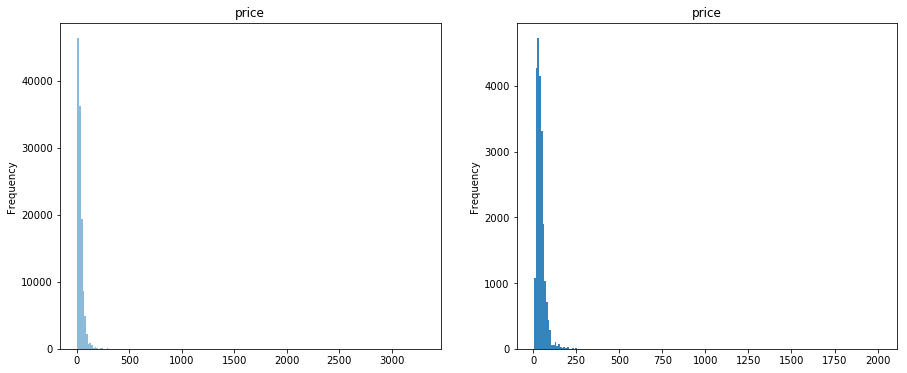

In [26]:
print("在winemag-data_first150k数据中：")
df_150_1 = df_150.dropna(how="any")
# 可视化对比新旧数据
nominal_attributes_bf_af(df_150, df_150_1, ['country', 'designation',  'province', 'region_1', 'region_2'])
plt.subplot(1, 2, 1)
df_150["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_150_1["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.9)
plt.show()
print(70 * '-')
print("在winemag-data-130k-v2数据中：")
df_130_1 = df_130.dropna(how="any")
# 可视化对比新旧数据
nominal_attributes_bf_af(df_130, df_130_1, ['country', 'designation',  'province', 'region_1', 'region_2', 'taster_name', 'variety'])
plt.subplot(1, 2, 1)
df_130["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_130_1["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.9)
plt.show()

In [40]:
# 查看数值属性points、price的五数概括
# winemag-data_first150k 数据
print("在winemag-data_first150k数据中：")
print("缺失值填充前：\n", df_150.describe())
print("缺失值填充后：\n", df_150_1.describe())
print(50 * '-')
# winemag-data-130k-v2 数据
print("在winemag-data-130k-v2数据中")
print("缺失值填充前：\n", df_130.describe())
print("缺失值填充后：\n", df_130_1.describe())

在winemag-data_first150k数据中：
缺失值填充前：
               points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000
缺失值填充后：
              points         price
count  39241.000000  39241.000000
mean      88.359981     37.546316
std        3.438542     26.716547
min       80.000000      4.000000
25%       86.000000     22.000000
50%       88.000000     32.000000
75%       91.000000     45.000000
max      100.000000   2013.000000
--------------------------------------------------
在winemag-data-130k-v2数据中
缺失值填充前：
               points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000   

#### 3.2 用最高频率值来填补缺失值

在winemag-data_first150k数据中：


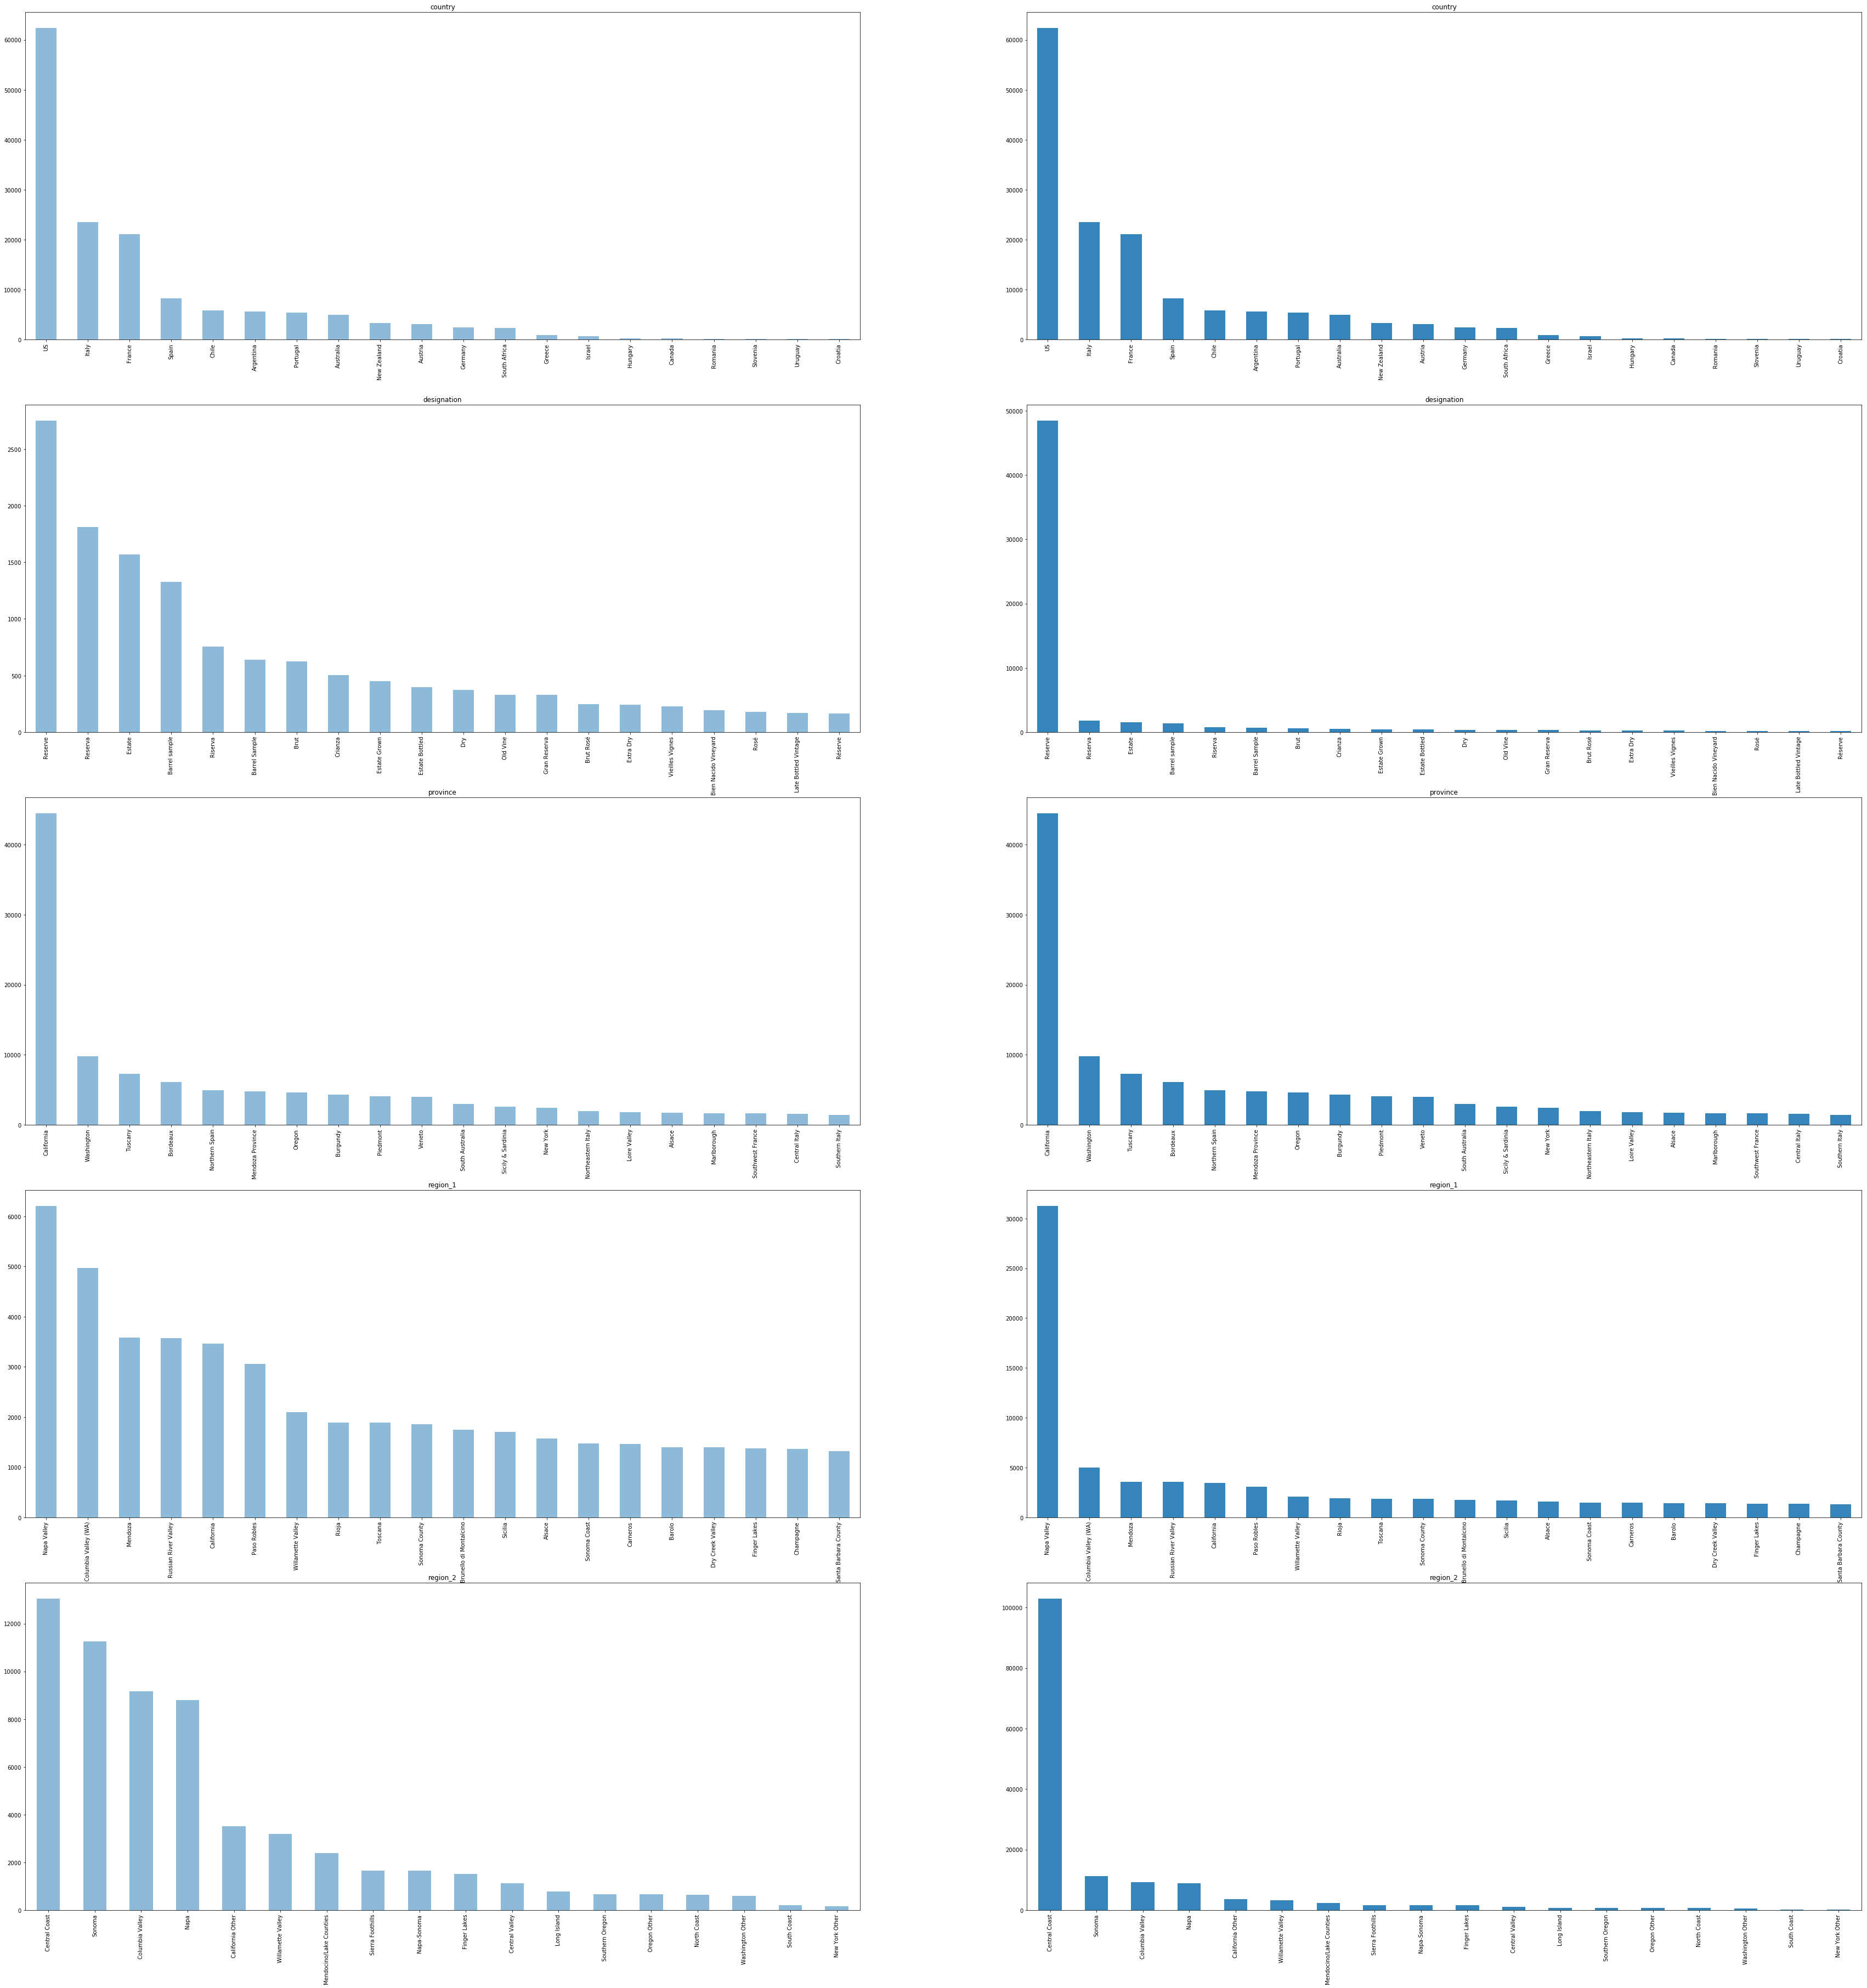

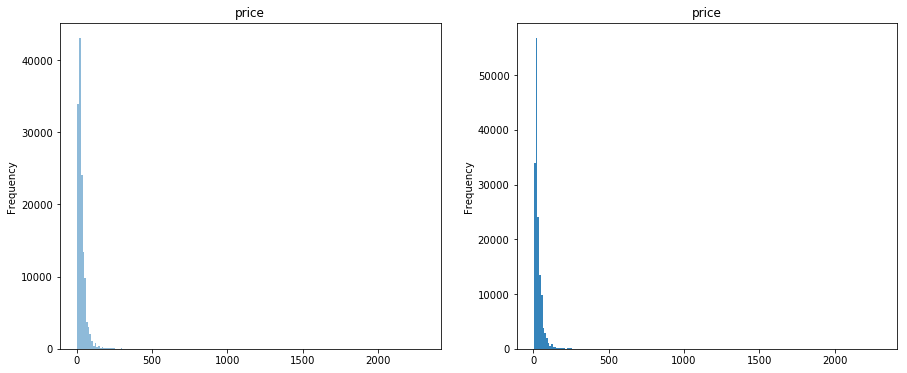

----------------------------------------------------------------------
在winemag-data-130k-v2数据中：


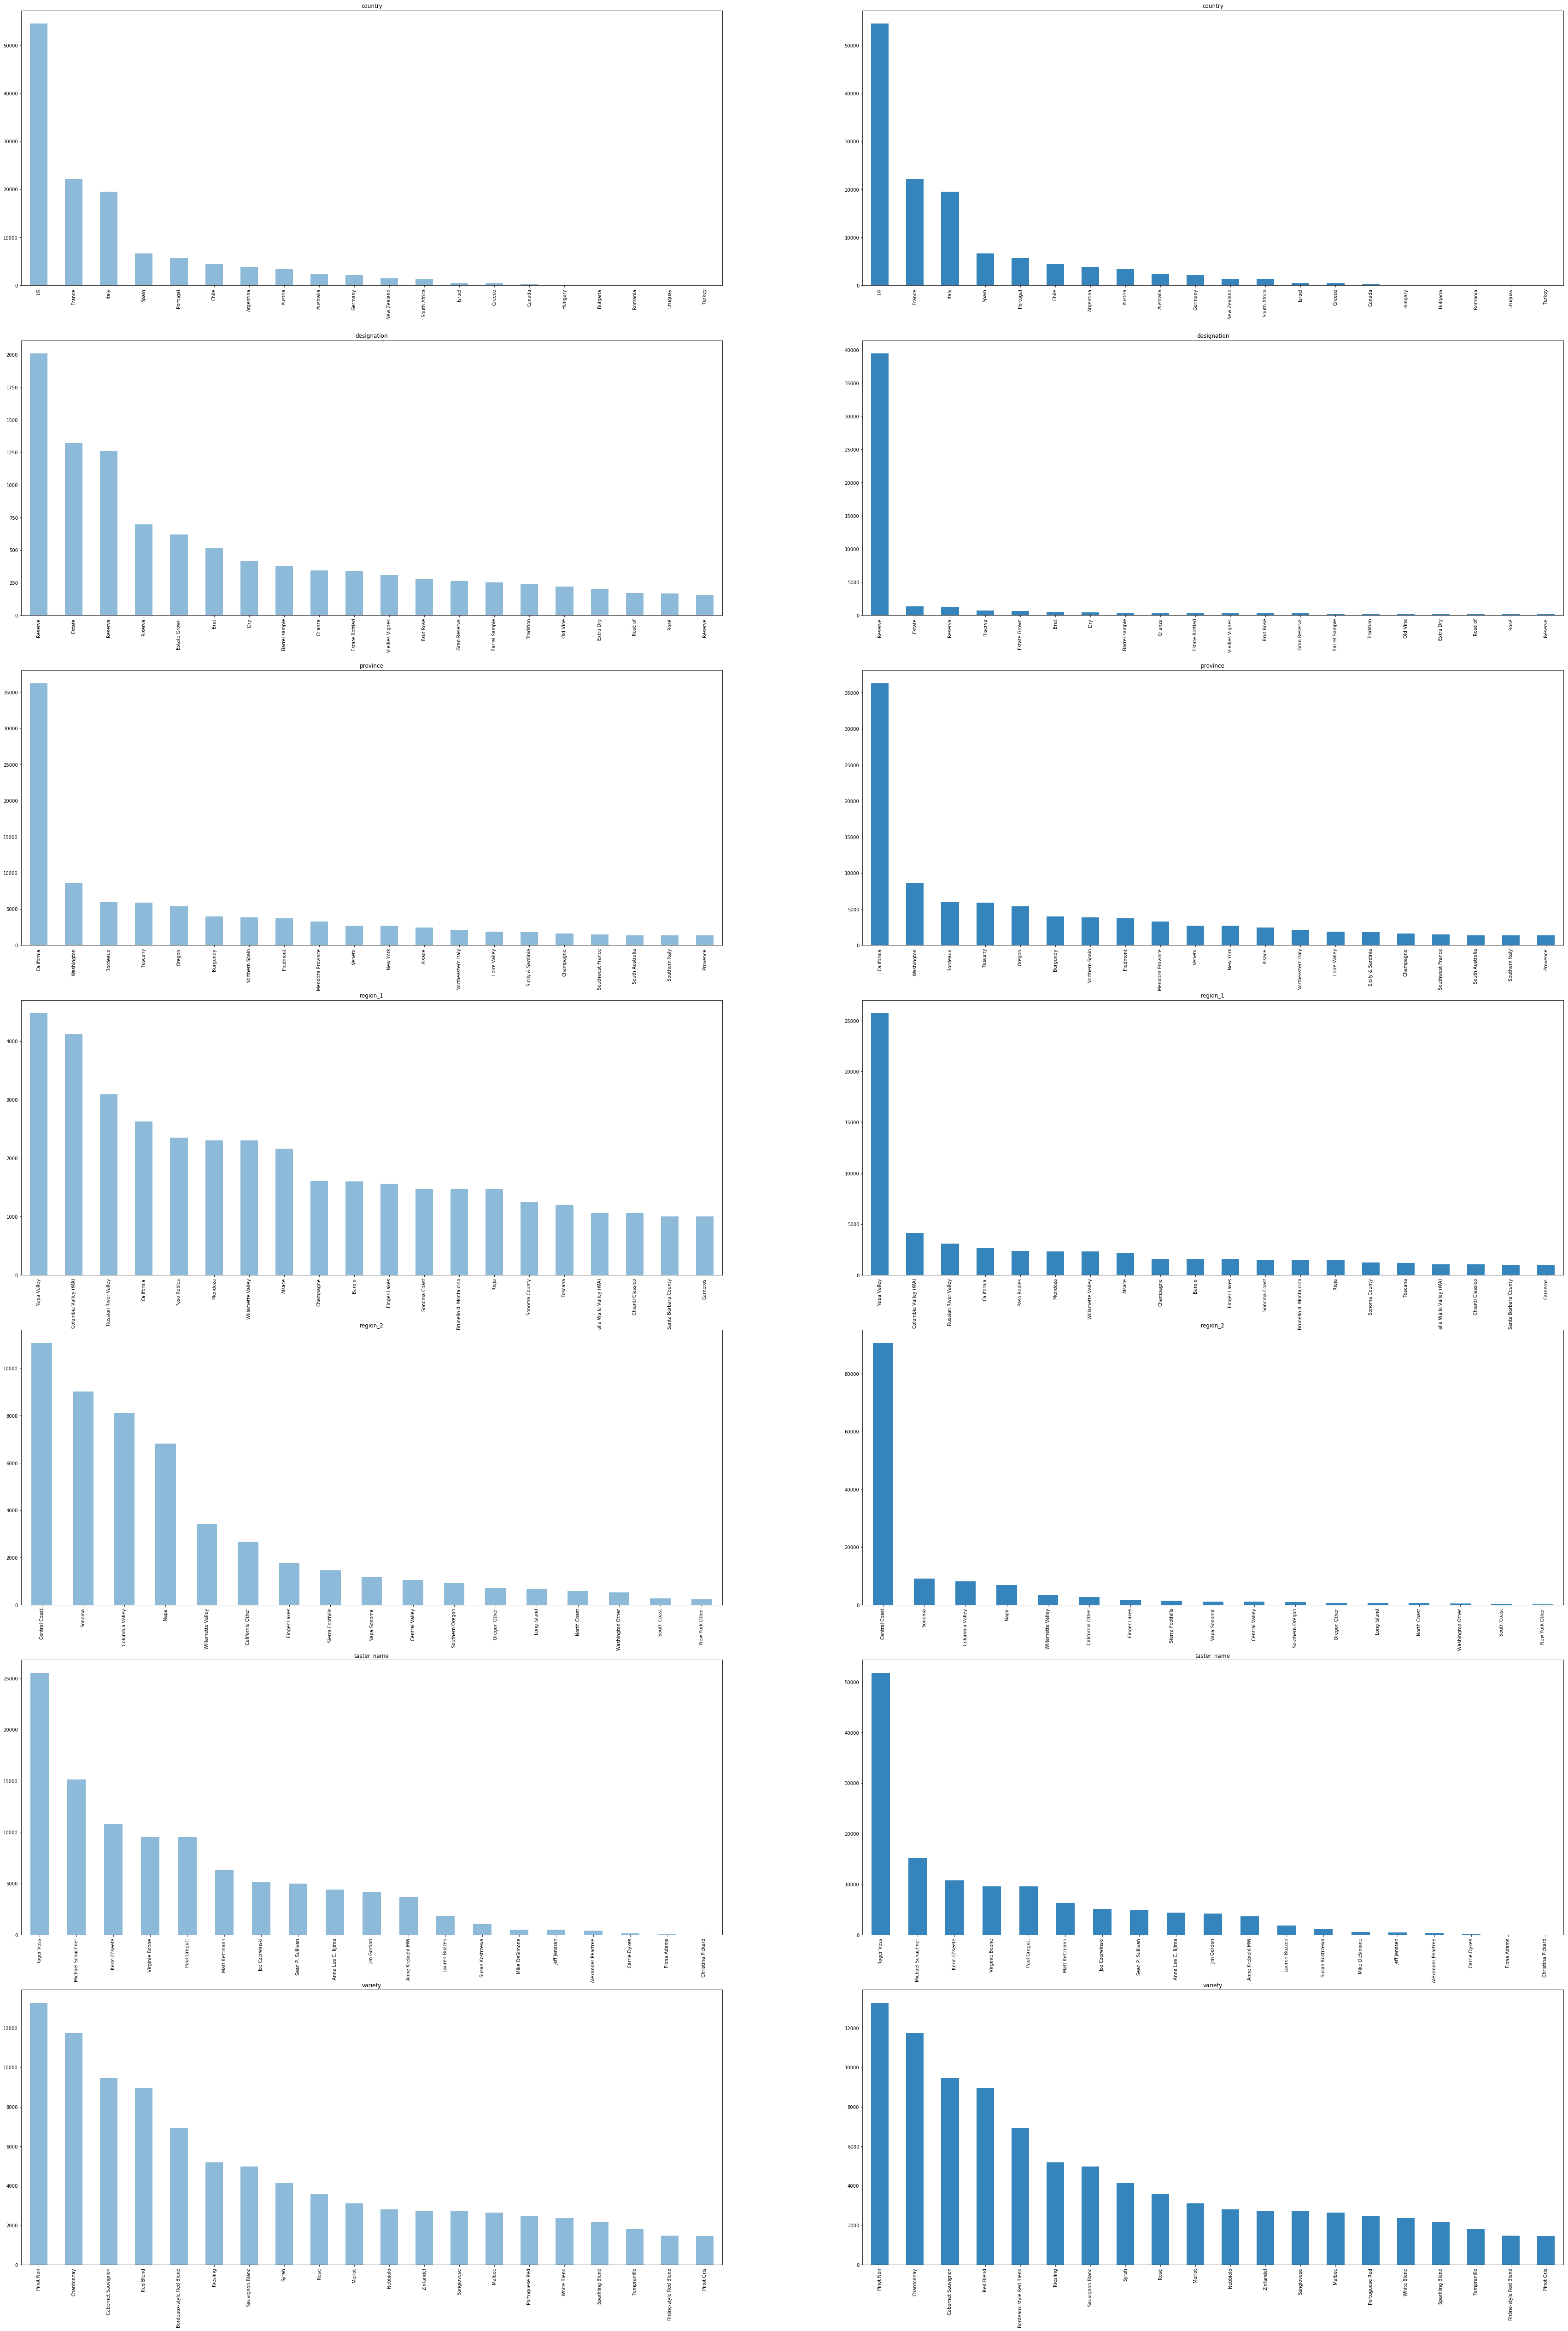

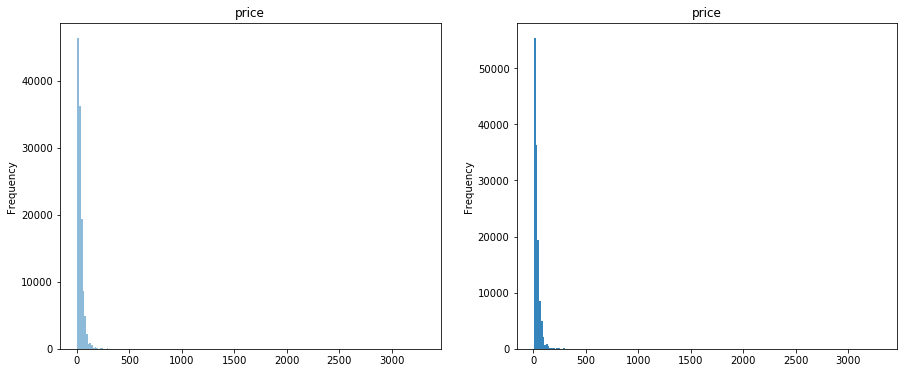

In [27]:
print("在winemag-data_first150k数据中：")
df_150_2 = df_150.fillna(df_150.mode().iloc[0])
# 可视化对比新旧数据
nominal_attributes_bf_af(df_150, df_150_2, ['country', 'designation',  'province', 'region_1', 'region_2'])
plt.subplot(1, 2, 1)
df_150["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_150_2["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.9)
plt.show()
print(70 * '-')
print("在winemag-data-130k-v2数据中：")
df_130_2 = df_130.fillna(df_130.mode().iloc[0])
# 可视化对比新旧数据
nominal_attributes_bf_af(df_130, df_130_2, ['country', 'designation',  'province', 'region_1', 'region_2', 'taster_name', 'variety'])
plt.subplot(1, 2, 1)
df_130["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_130_2["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.9)
plt.show()

In [41]:
# 查看数值属性points、price的五数概括
# winemag-data_first150k 数据
print("在winemag-data_first150k数据中：")
print("缺失值填充前：\n", df_150.describe())
print("缺失值填充后：\n", df_150_2.describe())
print(50 * '-')
# winemag-data-130k-v2 数据
print("在winemag-data-130k-v2数据中")
print("缺失值填充前：\n", df_130.describe())
print("缺失值填充后：\n", df_130_2.describe())

在winemag-data_first150k数据中：
缺失值填充前：
               points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000
缺失值填充后：
               points          price
count  150930.000000  150930.000000
mean       87.888418      31.939966
std         3.222392      34.840211
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      22.000000
75%        90.000000      38.000000
max       100.000000    2300.000000
--------------------------------------------------
在winemag-data-130k-v2数据中
缺失值填充前：
               points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%  

#### 3.3 通过属性的相关关系来填补缺失值

In [28]:
# 判断属性之间的相关性，价格和红酒的得分成正相关，根据相关系数验证
print("在winemag-data_first150k数据中：price和points相关系数为：{}".format(df_150['price'].corr(df_150['points'])))
print("在winemag-data-130k-v2数据中：price和points相关系数为：{}".format(df_130['price'].corr(df_130['points'])))

在winemag-data_first150k数据中：price和points相关系数为：0.4598634287426051
在winemag-data-130k-v2数据中：price和points相关系数为：0.41616674186062225


In [29]:
def fill_nan_with_corr(df, df_3):
    # 把已有的数值型特征取出来输入到RandomForestRegressor中
    process_df = df[['price', 'points']]
    # 已知该特征和未知该特征
    known = process_df[process_df.price.notnull()].as_matrix()
    unknown = process_df[process_df.price.isnull()].as_matrix()
    # X为特征属性值
    X = known[:, 1].reshape(-1,1)
    # y为结果标签值
    y = known[:, 0].reshape(-1,1)
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000,  n_jobs=-1)
    rfr.fit(X,y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1].reshape(-1,1))
    # 用得到的预测结果填补原缺失数据
    df_3.loc[(df_3.price.isnull()), 'price'] = predicted
    return df_3

在winemag-data_first150k数据中：


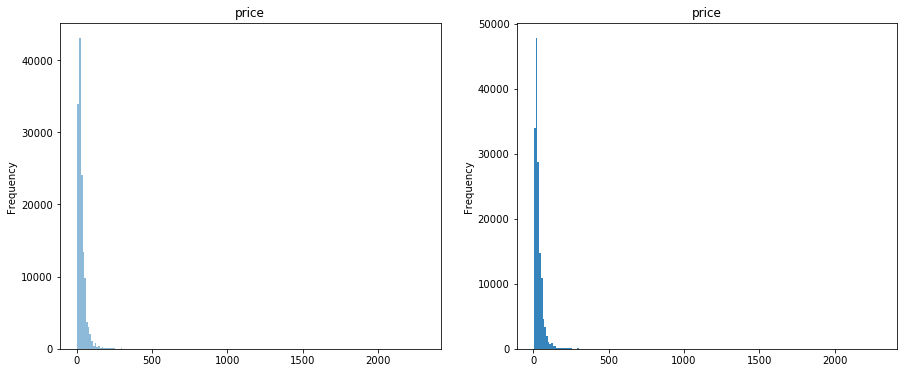

----------------------------------------------------------------------
在winemag-data-130k-v2数据中：


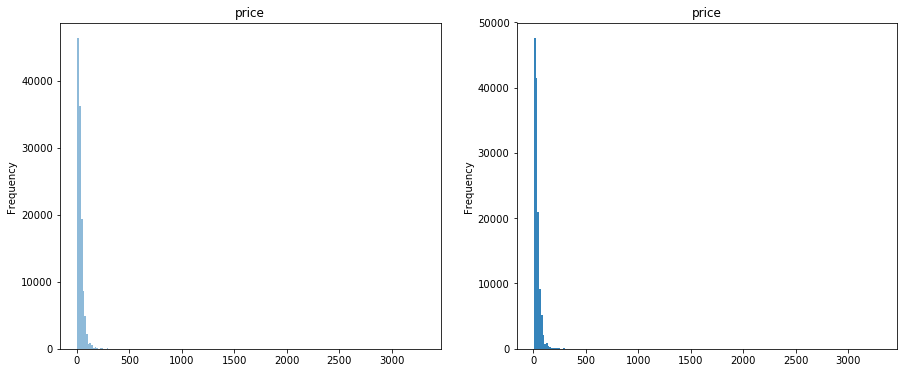

In [30]:
print("在winemag-data_first150k数据中：")
data_150_3 = copy.deepcopy(df_150)
df_150_3 = fill_nan_with_corr(df_150, data_150_3)
# 可视化对比新旧数据
plt.subplot(1, 2, 1)
df_150["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_150_3["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.9)
plt.show()
print(70 * '-')
print("在winemag-data-130k-v2数据中：")
data_130_3 = copy.deepcopy(df_130)
df_130_3 = fill_nan_with_corr(df_130, data_130_3)
# 可视化对比新旧数据
plt.subplot(1, 2, 1)
df_130["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_130_3["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.9)
plt.show()

In [43]:
# 查看数值属性points、price的五数概括
# winemag-data_first150k 数据
print("在winemag-data_first150k数据中：")
print("缺失值填充前：\n", df_150.describe())
print("缺失值填充后：\n", df_150_3.describe())
print(50 * '-')
# winemag-data-130k-v2 数据
print("在winemag-data-130k-v2数据中")
print("缺失值填充前：\n", df_130.describe())
print("缺失值填充后：\n", df_130_3.describe())

在winemag-data_first150k数据中：
缺失值填充前：
               points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000
缺失值填充后：
               points          price
count  150930.000000  150930.000000
mean       87.888418      33.626382
std         3.222392      35.443321
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      25.000000
75%        90.000000      40.000000
max       100.000000    2300.000000
--------------------------------------------------
在winemag-data-130k-v2数据中
缺失值填充前：
               points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%  

#### 3.4 通过数据对象之间的相似性来填补缺失值

在winemag-data_first150k数据中：


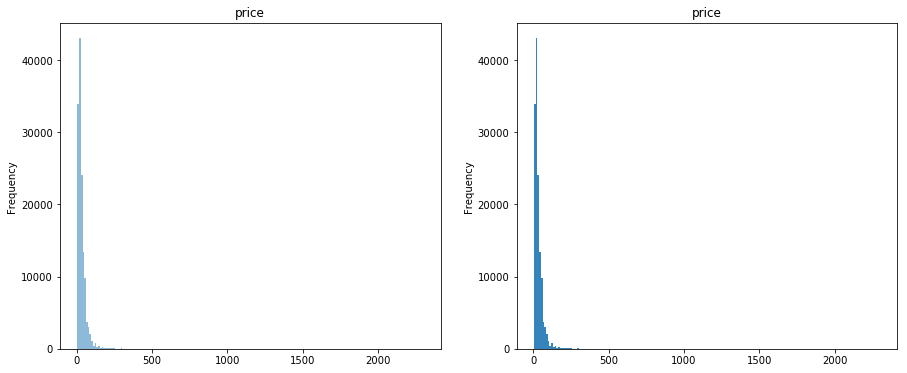

----------------------------------------------------------------------
在winemag-data-130k-v2数据中：


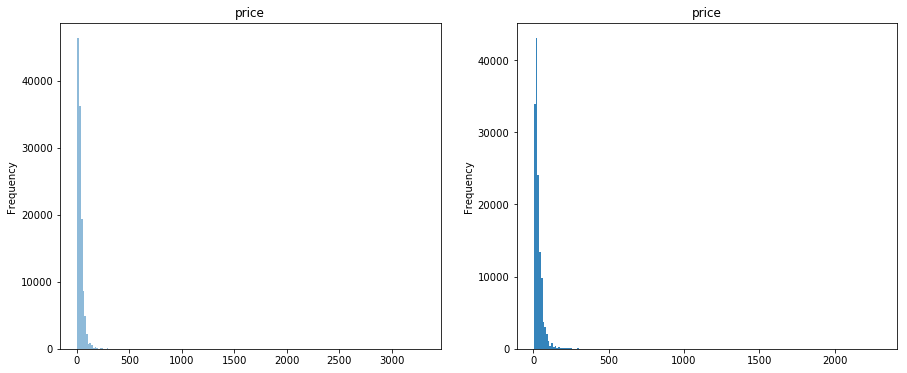

In [36]:
print("在winemag-data_first150k数据中：")
features = ['points', 'price']
df_150_4 = pd.DataFrame(fast_knn(np.array(df_150[features]), k=2), columns=features)
# 可视化对比新旧数据
plt.subplot(1, 2, 1)
df_150["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_150_4["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.9)
plt.show()
print(70 * '-')
print("在winemag-data-130k-v2数据中：")
df_130_4 = pd.DataFrame(fast_knn(np.array(df_150[features]), k=2), columns=features)
# 可视化对比新旧数据
plt.subplot(1, 2, 1)
df_130["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_130_4["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.9)

In [44]:
# 查看数值属性points、price的五数概括
# winemag-data_first150k 数据
print("在winemag-data_first150k数据中：")
print("缺失值填充前：\n", df_150.describe())
print("缺失值填充后：\n", df_150_4.describe())
print(50 * '-')
# winemag-data-130k-v2 数据
print("在winemag-data-130k-v2数据中")
print("缺失值填充前：\n", df_130.describe())
print("缺失值填充后：\n", df_130_4.describe())

在winemag-data_first150k数据中：
缺失值填充前：
               points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000
缺失值填充后：
               points          price
count  150930.000000  137242.000000
mean       87.888418      33.131482
std         3.222392      36.321610
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000
--------------------------------------------------
在winemag-data-130k-v2数据中
缺失值填充前：
               points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%  